In [ ]:
#here the data cleaning is done in python itself

In [120]:
import pandas as pd #Importing all necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [158]:
df=pd.read_csv(r'C:\Users\asus\Desktop\Mine\Projects\movies.csv')
df.sample(6).reset_index(drop=True).style.set_properties(**{'background-color': 'red','color': 'black','border-color': 'black'})

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,For Keeps?,PG-13,Comedy,1988,"January 15, 1988 (United States)",5.900000,4500.000000,John G. Avildsen,Tim Kazurinsky,Molly Ringwald,United States,nan,17514553.000000,TriStar Pictures,90.000000
1,The in Crowd,PG-13,Drama,2000,"July 19, 2000 (United States)",4.700000,4400.000000,Mary Lambert,Mark Gibson,Lori Heuring,United States,24000000.000000,5280035.000000,Morgan Creek Entertainment,105.000000
2,The Flamingo Kid,PG-13,Comedy,1984,"December 21, 1984 (United States)",6.200000,5000.000000,Garry Marshall,Neal Marshall,Matt Dillon,United States,nan,23859382.000000,ABC Motion Pictures,100.000000
3,Signs,PG-13,Drama,2002,"August 2, 2002 (United States)",6.700000,344000.000000,M. Night Shyamalan,M. Night Shyamalan,Mel Gibson,United States,72000000.000000,408247917.000000,Touchstone Pictures,106.000000
4,Thor,PG-13,Action,2011,"May 6, 2011 (United States)",7.000000,772000.000000,Kenneth Branagh,Ashley Miller,Chris Hemsworth,United States,150000000.000000,449326618.000000,Paramount Pictures,115.000000
5,The Land Before Time,G,Animation,1988,"November 18, 1988 (United States)",7.400000,82000.000000,Don Bluth,Stu Krieger,Pat Hingle,United States,12500000.000000,84460846.000000,Lucasfilm,69.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [24]:
df.describe()# gives out the stats of each of the numberic values

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [124]:
missing_data = df.isnull().sum()
missing_data

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [30]:
df['gross'] = df['gross'].fillna(0)
df['budget'] = df['budget'].fillna(0)

# Convert the columns from float64 to int64
df['gross'] = df['gross'].astype('int64')
df['budget'] = df['budget'].astype('int64')

In [32]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [36]:
df['released'] = df['released'].replace(r"\s\([^)]*\)", "", regex=True)

# Convert to datetime format
df['released'] = pd.to_datetime(df['released'], format='%B %d, %Y', errors='coerce')

# Check the result
print(df['released'].head())

0   1980-06-13
1   1980-07-02
2   1980-06-20
3   1980-07-02
4   1980-07-25
Name: released, dtype: datetime64[ns]


In [40]:
df.sort_values(by=['gross'],inplace=False , ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [42]:
# drop duplicates
df['company'].drop_duplicates().sort_values()

4345        "DIA" Productions GmbH & Co. KG
7525    "Weathering With You" Film Partners
3024                        .406 Production
3748                     1+2 Seisaku Iinkai
5813                        10 West Studios
                       ...                 
4007                               i5 Films
6412               iDeal Partners Film Fund
5664                            micro_scope
7129                                thefyzz
408                                     NaN
Name: company, Length: 2386, dtype: object

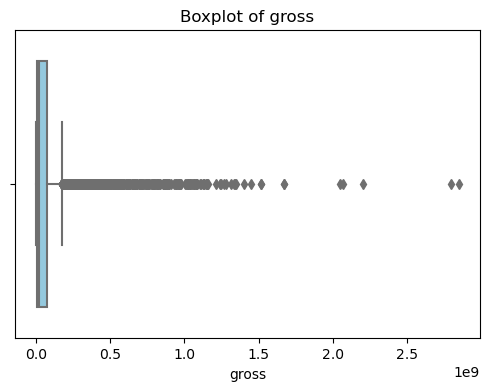

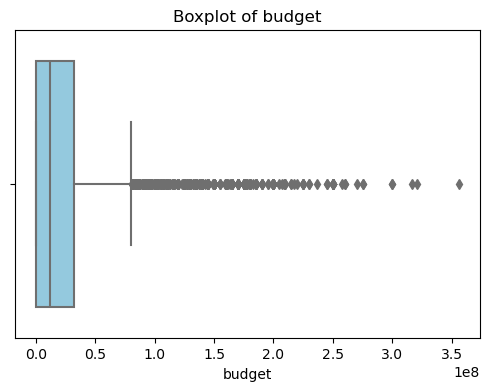

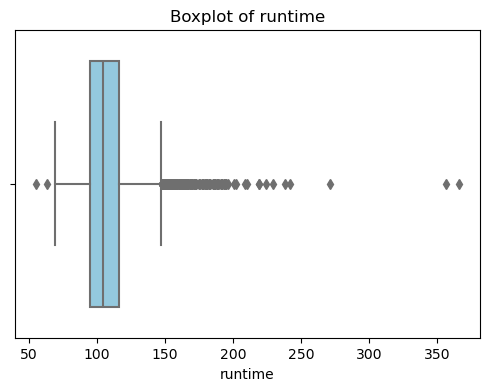

In [44]:
# detect the outliers 
numeric_columns = ['gross', 'budget', 'runtime']


for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

In [46]:
#to list outliers of gross 
Q1 = df['gross'].quantile(0.25)
Q3 = df['gross'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['gross'] < lower_bound) | (df['gross'] > upper_bound)]
print(outliers)

                                                name     rating      genre  \
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
92     Indiana Jones and the Raiders of the Lost Ark         PG     Action   
209                       E.T. the Extra-Terrestrial         PG     Family   
221                                          Tootsie         PG     Comedy   
333       Star Wars: Episode VI - Return of the Jedi         PG     Action   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   
7655                           Legend of Deification      TV-PG  Animation   

      year   released  score      votes          director      

In [48]:
#to list outliers of budget 
Q1 = df['budget'].quantile(0.25)
Q3 = df['budget'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['budget'] < lower_bound) | (df['budget'] > upper_bound)]
print(outliers)

                            name rating      genre  year   released  score  \
1843  Terminator 2: Judgment Day      R     Action  1991 1991-07-03    8.5   
2262            Last Action Hero  PG-13     Action  1993 1993-06-18    6.4   
2447                   True Lies      R     Action  1994 1994-07-15    7.2   
2652              Batman Forever  PG-13     Action  1995 1995-06-16    5.4   
2656   Die Hard with a Vengeance      R     Action  1995 1995-05-19    7.6   
...                          ...    ...        ...   ...        ...    ...   
7645               Birds of Prey      R     Action  2020 2020-02-07    6.1   
7648           Bad Boys for Life      R     Action  2020 2020-01-17    6.6   
7649          Sonic the Hedgehog     PG     Action  2020 2020-02-14    6.5   
7650                    Dolittle     PG  Adventure  2020 2020-01-17    5.6   
7651        The Call of the Wild     PG  Adventure  2020 2020-02-21    6.8   

          votes         director              writer           

In [50]:
#to list outliers of runtime 
Q1 = df['runtime'].quantile(0.25)
Q3 = df['runtime'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['runtime'] < lower_bound) | (df['runtime'] > upper_bound)]
print(outliers)

                                  name     rating      genre  year   released  \
21                       Heaven's Gate          R  Adventure  1980 1981-04-24   
49                  Lion of the Desert         PG  Biography  1980 1981-05-16   
66    Moscow Does Not Believe in Tears         PG     Comedy  1980 1980-02-11   
102                           Das Boot        NaN  Adventure  1981 1982-02-10   
115                               Reds         PG  Biography  1981 1981-12-25   
...                                ...        ...        ...   ...        ...   
7613          42nd Street: The Musical  Not Rated    Musical  2019 2019-05-01   
7634             My People, My Country        NaN      Drama  2019 2019-10-01   
7643                             Tenet      PG-13     Action  2020 2020-09-03   
7644                 Wonder Woman 1984      PG-13     Action  2020 2020-12-25   
7652                 The Eight Hundred  Not Rated     Action  2020 2020-08-28   

      score     votes      

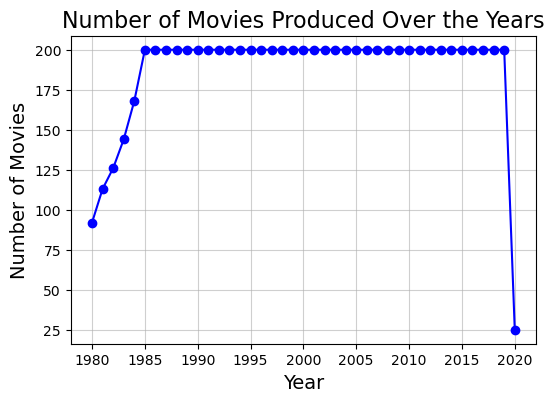

In [126]:
# plot of n of movies over thhe years
movies_per_year = df.groupby('year')['name'].count()
plt.figure(figsize=(6, 4))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', color='b', linestyle='-')
plt.title("Number of Movies Produced Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.grid(True, alpha=0.6)
plt.show()

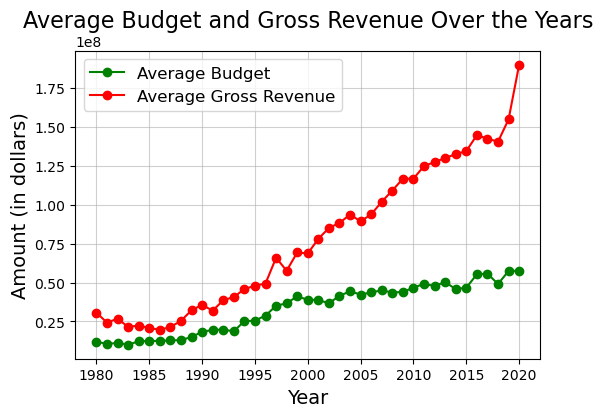

In [128]:
# Plot the average budget and gross revenue by year trends trends
avg_budget_gross = df.groupby('year')[['budget', 'gross']].mean()
plt.figure(figsize=(6, 4))
plt.plot(avg_budget_gross.index, avg_budget_gross['budget'], label='Average Budget', marker='o', color='g')
plt.plot(avg_budget_gross.index, avg_budget_gross['gross'], label='Average Gross Revenue', marker='o', color='r')
plt.title("Average Budget and Gross Revenue Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Amount (in dollars)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.6)
plt.show()

In [60]:
# Select relevant numeric columns for correlation analysis
correlation_columns = ['budget', 'gross', 'score', 'votes']
correlation_matrix = df[correlation_columns].corr()
correlation_matrix

,budget,gross,score,votes
budget,1.000000,0.750157,0.055665,0.486862
gross,0.750157,1.000000,0.186392,0.632834
score,0.055665,0.186392,1.000000,0.409182
votes,0.486862,0.632834,0.409182,1.000000


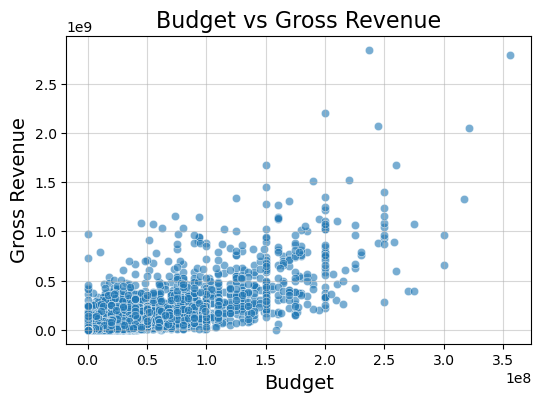

In [64]:
# Scatter plot to check relationship between budget and gross
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='budget', y='gross', alpha=0.6)
plt.title("Budget vs Gross Revenue", fontsize=16)
plt.xlabel("Budget", fontsize=14)
plt.ylabel("Gross Revenue", fontsize=14)
plt.grid(alpha=0.5)
plt.show()

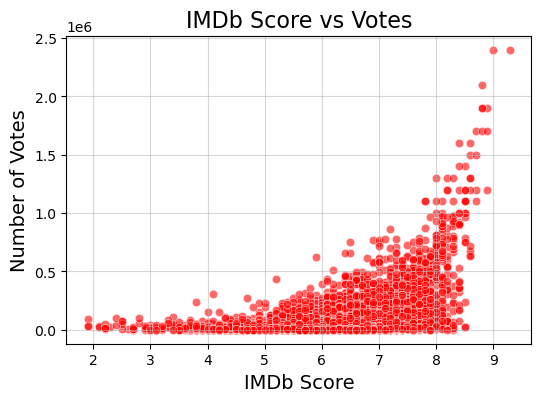

In [130]:
# Scatter plot to check the relationship between score and votes
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='score', y='votes', alpha=0.6, color='red')
plt.title("IMDb Score vs Votes", fontsize=16)
plt.xlabel("IMDb Score", fontsize=14)
plt.ylabel("Number of Votes", fontsize=14)
plt.grid(alpha=0.5)
plt.show()

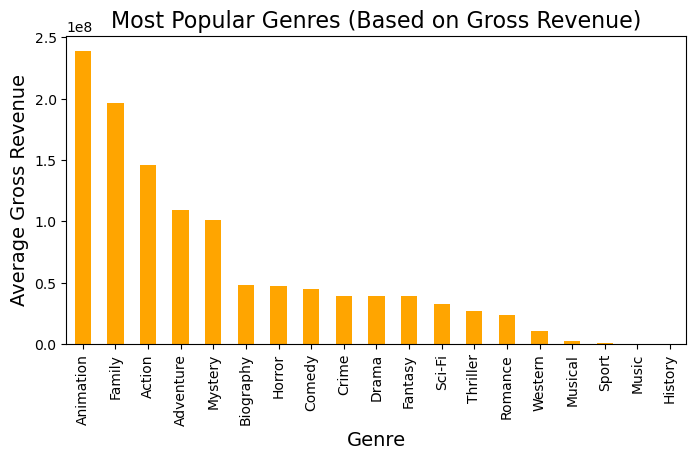

In [132]:
# Plot the most popular genres based on gross revenue
genre_analysis = df.groupby('genre')[['gross', 'votes']].mean().sort_values(by='gross', ascending=False)
plt.figure(figsize=(8, 4))
genre_analysis['gross'].sort_values(ascending=False).plot(kind='bar', color='green')
plt.title("Most Popular Genres (Based on Gross Revenue)", fontsize=16)
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Average Gross Revenue", fontsize=14)
plt.show()

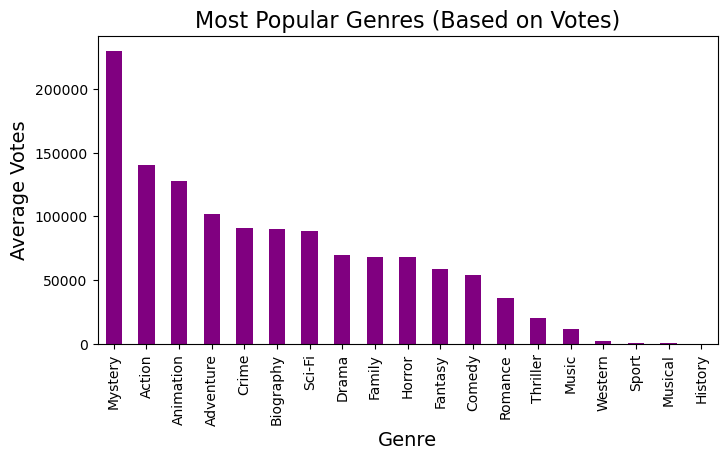

In [136]:
# Plot the most popular genres based on votes
plt.figure(figsize=(8, 4))
genre_analysis['votes'].sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title("Most Popular Genres (Based on Votes)", fontsize=16)
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Average Votes", fontsize=14)
plt.show()

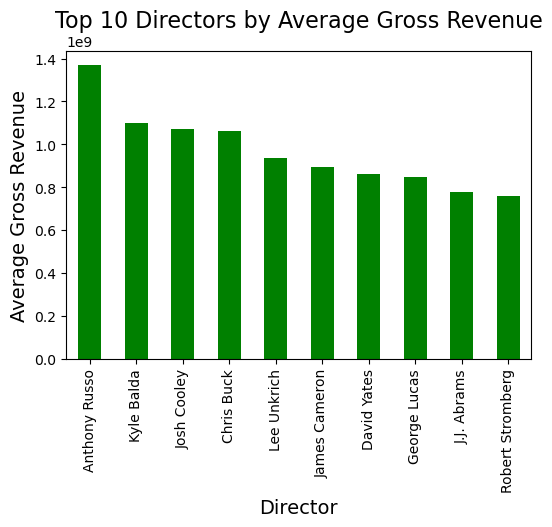

In [138]:
# Plot top 10 directors
top_directors = df.groupby('director')['gross'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(6, 4))
top_directors.plot(kind='bar', color='green')
plt.title("Top 10 Directors by Average Gross Revenue", fontsize=16)
plt.xlabel("Director", fontsize=14)
plt.ylabel("Average Gross Revenue", fontsize=14)
plt.show()

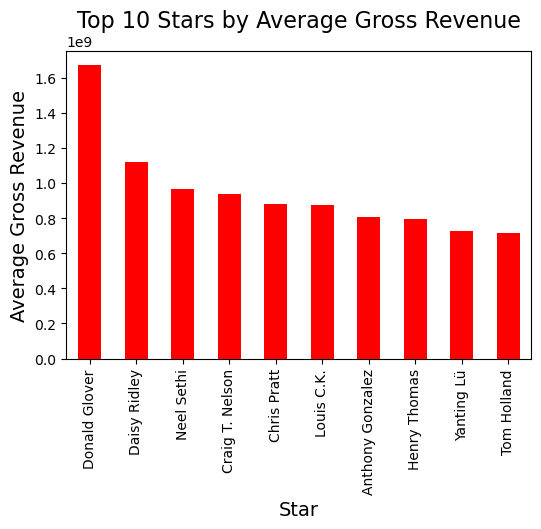

In [140]:
# Plot top 10 stars  average gross revenue
top_stars = df.groupby('star')['gross'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(6, 4))
top_stars.plot(kind='bar', color='red')
plt.title("Top 10 Stars by Average Gross Revenue", fontsize=16)
plt.xlabel("Star", fontsize=14)
plt.ylabel("Average Gross Revenue", fontsize=14)
plt.show()

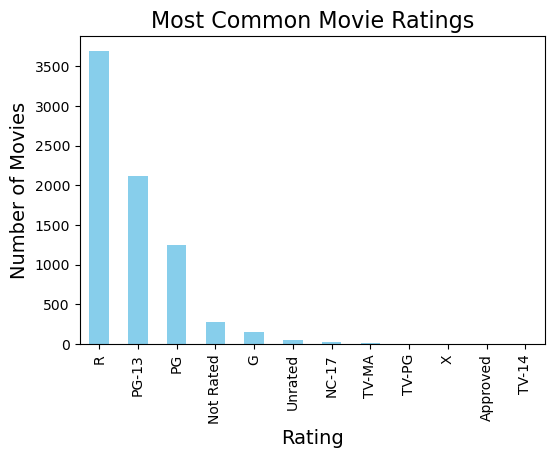

In [142]:
# Plot most common genre ratings
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(6, 4))
rating_counts.plot(kind='bar', color='skyblue')
plt.title("Most Common Movie Ratings", fontsize=16)
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.show()

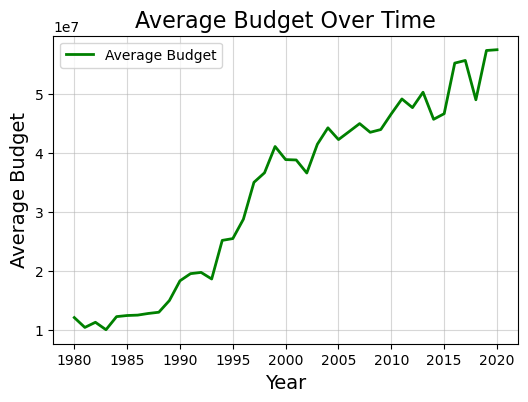

In [146]:
# Plot average budget over the years
time_analysis = df.groupby('year')[['budget', 'gross', 'runtime']].mean()
plt.figure(figsize=(6, 4))
time_analysis['budget'].plot(label='Average Budget', color='green', linewidth=2)
plt.title("Average Budget Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Budget", fontsize=14)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

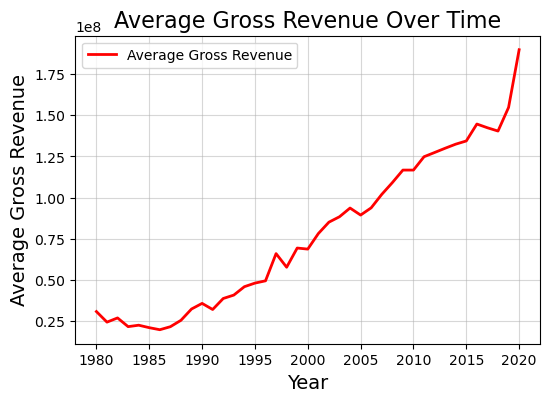

In [148]:
# Plot average gross revenue over the years
plt.figure(figsize=(6, 4))
time_analysis['gross'].plot(label='Average Gross Revenue', color='red', linewidth=2)
plt.title("Average Gross Revenue Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Gross Revenue", fontsize=14)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

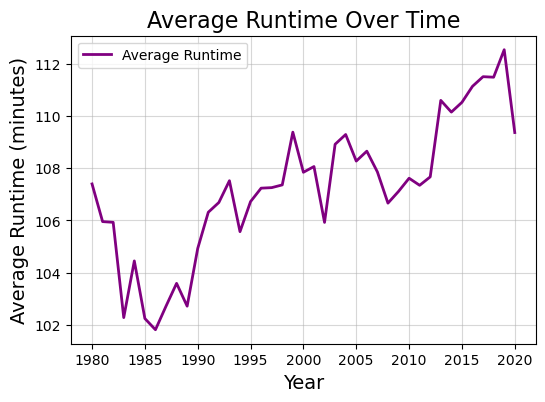

In [94]:
# Plot average runtime over the years
plt.figure(figsize=(6, 4))
time_analysis['runtime'].plot(label='Average Runtime', color='purple', linewidth=2)
plt.title("Average Runtime Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Runtime (minutes)", fontsize=14)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

<Figure size 800x600 with 0 Axes>

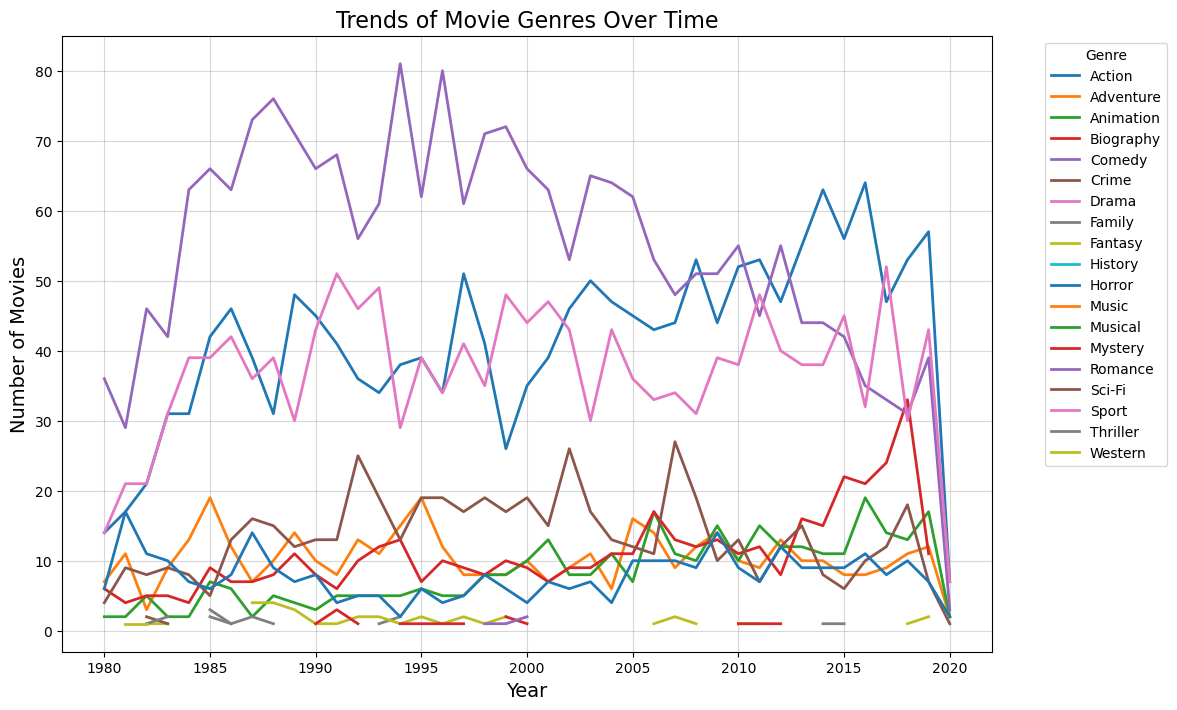

In [150]:
# Plot genre trends over the years
genre_trends = df.groupby(['year', 'genre'])['name'].count().unstack()
plt.figure(figsize=(8, 6))
genre_trends.plot(kind='line', figsize=(12, 8), linewidth=2)
plt.title("Trends of Movie Genres Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5)
plt.show()

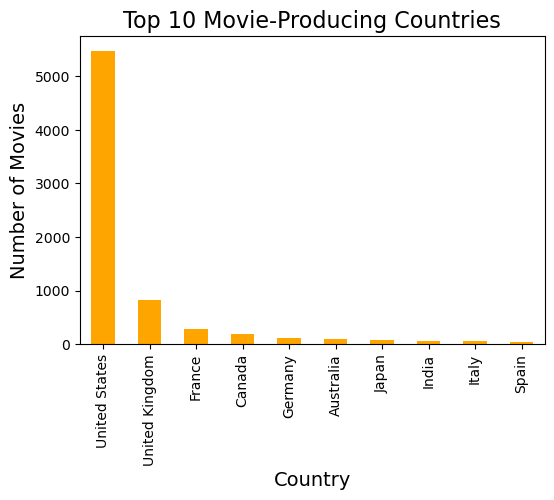

In [152]:
# Plot top 10 movie-producing countries
movies_by_country = df['country'].value_counts().head(10)
plt.figure(figsize=(6, 4))
movies_by_country.plot(kind='bar', color='orange')
plt.title("Top 10 Movie-Producing Countries", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.show()

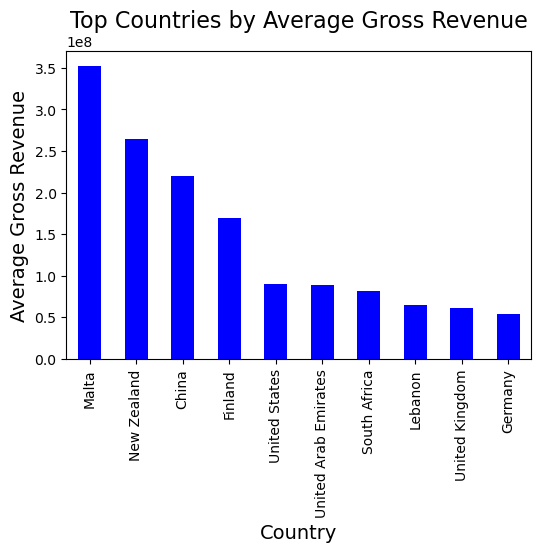

In [154]:
# Plot top countries by average gross revenue
country_analysis = df.groupby('country')[['gross', 'score']].mean().sort_values(by='gross', ascending=False).head(10)
plt.figure(figsize=(6, 4))
country_analysis['gross'].plot(kind='bar', color='blue')
plt.title("Top Countries by Average Gross Revenue", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Average Gross Revenue", fontsize=14)
plt.show()

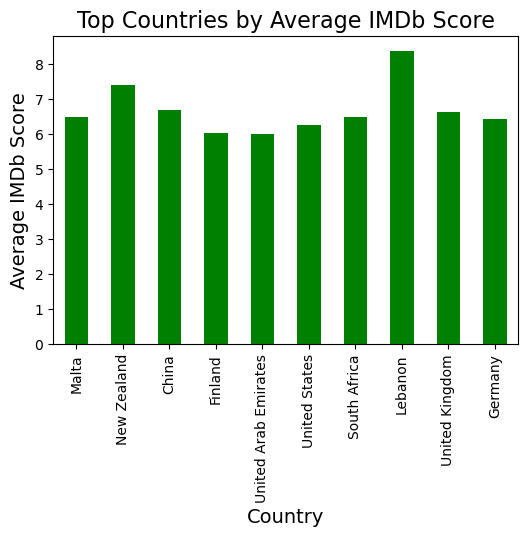

In [108]:
# Plot top countries by average IMDb score
plt.figure(figsize=(6, 4))
country_analysis['score'].plot(kind='bar', color='green')
plt.title("Top Countries by Average IMDb Score", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Average IMDb Score", fontsize=14)
plt.show()

In [110]:
# Count the occurrences of each genre
genre_counts = df['genre'].value_counts()
genre_counts


genre
Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
Music           1
History         1
Sport           1
Name: count, dtype: int64

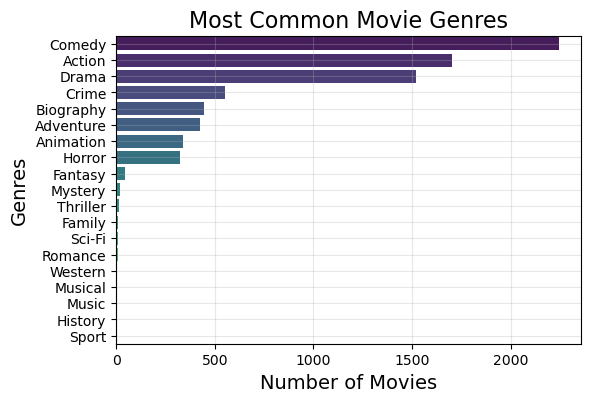

In [112]:
# Plot the most common genres
plt.figure(figsize=(6, 4))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title("Most Common Movie Genres", fontsize=16)
plt.xlabel("Number of Movies", fontsize=14)
plt.ylabel("Genres", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

In [118]:
avg_score_by_star = df.groupby('star')['score'].mean().sort_values(ascending=False).head(10)
avg_score_by_star

star
Alexandre Rodrigues    8.6
Luigi Lo Cascio        8.5
Mark Hamill            8.5
Kay Kay Menon          8.5
Philippe Noiret        8.5
Ben Burtt              8.4
Yôji Matsuda           8.4
Ulrich Mühe            8.4
Anthony Gonzalez       8.4
Zain Al Rafeea         8.4
Name: score, dtype: float64